По материалам

https://www.kaggle.com/code/abirhasan1703100/hopfield-neural-networks-algorithm

https://github.com/nosratullah/hopfieldNeuralNetwork/tree/master

# Теоретическое описание

Сеть Хопфилда состоит из нейронов, каждый из которых может принимать на входе и выходе только два значения. Всего в сети бывает $N$ нейронов.

$y_i = \left\{\begin{matrix} 1, \\ -1\end{matrix}\right.$

Сеть полностью рекурентная. Состоит из одного слоя, в которой каждый нейрон связан с другими нейронами. Схема сети представлена ниже.

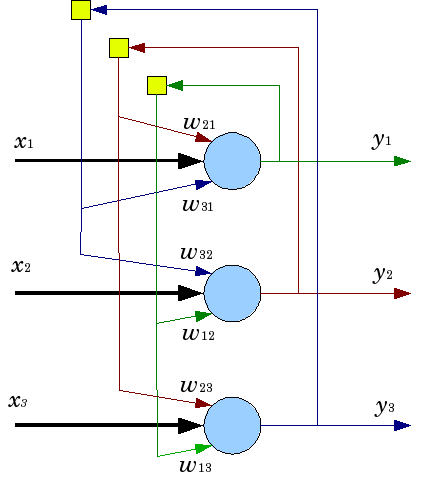

Ключевое правило сети, на основании которой можно вычислить все веса выглядит следующим образом: $X_i=WX_i$

$X_i$ - запомненные образы.

Таким образом веса вычисляются по формуле:
$W=\frac{1}{N}\sum_{i}X_{i}X_{i}^{T}$

Сеть считает веса один раз, затем остаётся в таком состоянии.

Применяется сеть последовательно с использованием пороговой функции активнации $F = sgn(x)$.

$X(t+1)=F(WX(t))$

Расчёт состояний заканчивается тогда, когда либо состояния совпадут, либо число итераций для применения закончится.

## Пример №1

In [1]:
import numpy as np

In [2]:
etalons = np.array([
    [-1, -1, 1, -1, 1],
    [1, -1, 1, -1, 1],
    [-1, 1, -1, 1, -1],
    [1, 1, 1, -1, -1]
])

objects = np.array([
    [-1, -1, -1, -1, 1],
    [1, -1, 1, -1, -1],
    [-1, 1, -1, -1, -1],
    [-1, 1, -1, -1, -1]
])

size = etalons.shape[1]

In [3]:
weights = np.zeros((size, size))

for pattern in etalons:
    pattern = np.reshape(pattern, (1, size))
    weights += np.dot(pattern.T, pattern)
np.fill_diagonal(weights, 0)

weights

array([[ 0.,  0.,  2., -2.,  0.],
       [ 0.,  0., -2.,  2., -4.],
       [ 2., -2.,  0., -4.,  2.],
       [-2.,  2., -4.,  0., -2.],
       [ 0., -4.,  2., -2.,  0.]])

In [4]:
max_iterations=10

for i, noisy_pattern in enumerate(objects):
    iteration = 0
    while iteration < max_iterations:
        iteration += 1
        prev_pattern = np.copy(noisy_pattern)
        noisy_pattern = np.sign(np.dot(noisy_pattern, weights))
        if np.array_equal(noisy_pattern, prev_pattern):
            break

#         distances = np.sum(np.abs(patterns - noisy_pattern), axis=1)
#         closest_match_idx = np.argmin(distances)

    #print('{:<25} {:<10} {:<10}'.format("Исходный объект", i, str(tuple(etalons[i]))))
    print('{:<25} {:<10} {:<10}'.format("Зшумлённый объект", i, str(tuple(objects[i]))))
    print('{:<25} {:<10} {:<10}'.format("Результат востановления", i, str(tuple(noisy_pattern))))

    print("")

Зшумлённый объект         0          (-1, -1, -1, -1, 1)
Результат востановления   0          (1.0, -1.0, 1.0, -1.0, 1.0)

Зшумлённый объект         1          (1, -1, 1, -1, -1)
Результат востановления   1          (1.0, -1.0, 1.0, -1.0, 1.0)

Зшумлённый объект         2          (-1, 1, -1, -1, -1)
Результат востановления   2          (-1.0, 1.0, -1.0, 1.0, -1.0)

Зшумлённый объект         3          (-1, 1, -1, -1, -1)
Результат востановления   3          (-1.0, 1.0, -1.0, 1.0, -1.0)



## Пример №2

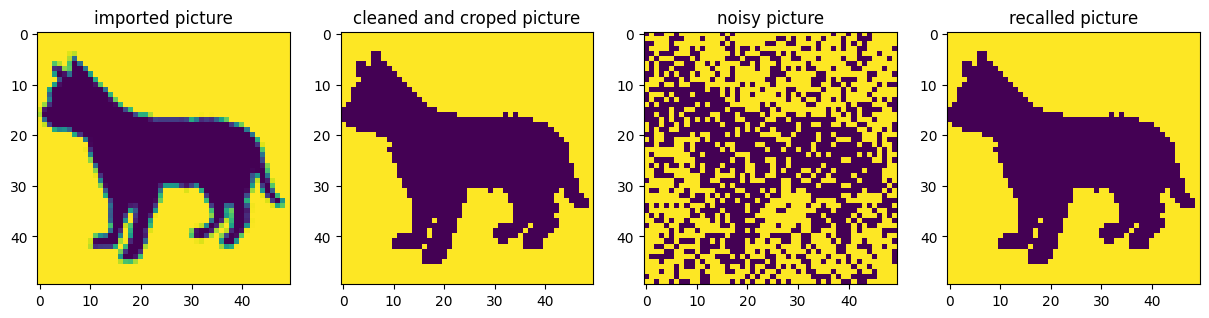

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as sp
import matplotlib.image as img

def trainer(vector):
    vector = vector.flatten()
    coefMat = np.zeros([len(vector),len(vector)])

    for i in range(len(vector)):
        for j in range(len(vector)):
            if (i!=(j)):
                coefMat[i][i-j] = vector[i]*vector[i-j]
    vector = np.reshape(vector, [int(np.sqrt(len(vector))),int(np.sqrt(len(vector)))])

    return coefMat

def prediction(curuptedVec,coefMat):
    curuptedVec = curuptedVec.flatten()
    predictVec = np.zeros(len(curuptedVec))
    for i in range(len(curuptedVec)):
        temp = 0
        for j in range(len(curuptedVec)):
             temp += coefMat[i][j] * curuptedVec[j]
        if (temp>0):
            predictVec[i] = 1
        if (temp<0):
            predictVec[i] = -1

    predictVec = np.reshape(predictVec, [int(np.sqrt(len(predictVec))),int(np.sqrt(len(predictVec)))])
    return predictVec

def imageGenerator(imageVector, vmax = 1):
    cleanImage = np.zeros([len(imageVector),len(imageVector)])
    for i in range(len(imageVector)):
        for j in range(len(imageVector)):
            if (imageVector[i][j] == vmax):
                cleanImage[i][j] = 1
            else:
                cleanImage[i][j] = -1
    noisyImage = cleanImage + np.random.normal(0, 2, [len(image1),len(image1)])

    for i in range(len(image1)):
        for j in range(len(image1)):
            if (noisyImage[i][j] >= 0):
                noisyImage[i][j] = 1
            else:
                noisyImage[i][j] = -1


    return cleanImage,noisyImage

#Import the image
image1 = img.imread('1.png','w').copy()
vector,noisyVec = imageGenerator(image1)
coefMatrix = trainer(vector)
predictedVec = prediction(noisyVec,coefMatrix)

plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(image1)
plt.title('imported picture')
plt.subplot(1,4,2)
plt.imshow(vector);
plt.title('cleaned and croped picture')
plt.subplot(1,4,3)
plt.imshow(noisyVec);
plt.title('noisy picture')
plt.subplot(1,4,4)
plt.imshow(predictedVec);
plt.title('recalled picture')
plt.show()

vector1 = vector
noisyVec1 = noisyVec
predictedVec1 = predictedVec

(array([ 0,  0,  0, ..., 49, 49, 49], dtype=int64), array([ 0,  1,  2, ..., 47, 48, 49], dtype=int64))


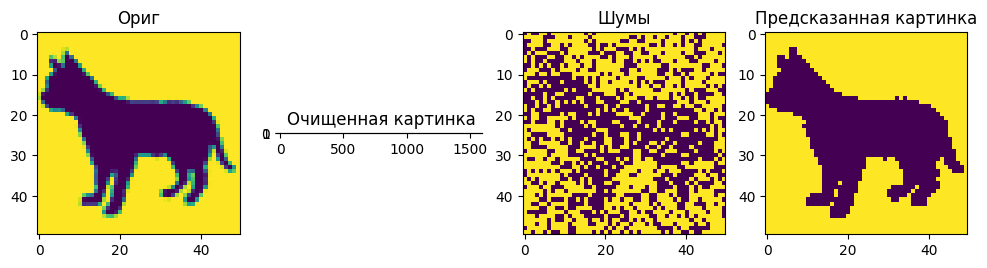

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

def trainer(vector):
    vector = vector.flatten()
    coefMat = np.outer(vector, vector)
    np.fill_diagonal(coefMat, 0)
    
    return coefMat

def prediction(corruptedVec, coefMat):
    corruptedVec = corruptedVec.flatten()

    temp = np.dot(coefMat, corruptedVec)
    predictVec = np.where(temp > 0, 1, -1)
    predictVec = np.reshape(predictVec, [int(np.sqrt(len(predictVec))), int(np.sqrt(len(predictVec)))])
    return predictVec

def imageGenerator(imageVector, vmax=1):
    cleanImage = np.where(imageVector == vmax)
    print(cleanImage)
    # noisyImage = cleanImage + np.random.normal(0, 2, cleanImage.shape)
    # noisyImage = np.where(noisyImage >= 0, 1, -1)
    
    return cleanImage

if __name__ == "__main__":
    image = img.imread('1.png','w').copy()
    vector = imageGenerator(image)
    # coefMatrix = trainer(vector)
    # predictedVec = prediction(noisyVec,coefMatrix)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 4, 1)
    plt.title("Ориг")
    plt.imshow(image)

    plt.subplot(1, 4, 2)
    plt.title('Очищенная картинка')
    plt.imshow(vector)

    plt.subplot(1, 4, 3)
    plt.title("Шумы")
    plt.imshow(noisyVec)

    plt.subplot(1, 4, 4)
    plt.title("Предсказанная картинка")
    plt.imshow(predictedVec)

    plt.show()


In [ ]:
print(np.array_equal(image1, image))
print(np.array_equal(vector1, vector))
print(np.array_equal(predictedVec1, predictedVec))
np.array_equal(noisyVec1, noisyVec)

True
True
True


False